In [179]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [180]:
df = pd.read_csv('Online Shop Customer Sales Data.csv')

In [181]:
df.head()

,Customer_id,Age,Gender,Revenue_Total,N_Purchases,Purchase_DATE,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher
0,504308,53,0,45.3,2,22.06.21,24.915,1,885,0,0,0
1,504309,18,1,36.2,3,10.12.21,2.896,2,656,0,0,1
2,504310,52,1,10.6,1,14.03.21,10.600,0,761,0,1,0
3,504311,29,0,54.1,5,25.10.21,43.280,1,906,0,1,0
4,504312,21,1,56.9,1,14.09.21,56.900,1,605,0,1,0


In [182]:
df.head(7)

,Customer_id,Age,Gender,Revenue_Total,N_Purchases,Purchase_DATE,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher
0,504308,53,0,45.3,2,22.06.21,24.915,1,885,0,0,0
1,504309,18,1,36.2,3,10.12.21,2.896,2,656,0,0,1
2,504310,52,1,10.6,1,14.03.21,10.600,0,761,0,1,0
3,504311,29,0,54.1,5,25.10.21,43.280,1,906,0,1,0
4,504312,21,1,56.9,1,14.09.21,56.900,1,605,0,1,0
5,504313,55,0,13.7,6,14.05.21,12.467,1,364,1,0,0
6,504314,17,1,30.7,6,09.01.21,2.456,0,654,0,0,0


In [183]:
df.shape

(65796, 12)

In [184]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65796 entries, 0 to 65795
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Customer_id     65796 non-null  int64  
 1   Age             65796 non-null  int64  
 2   Gender          65796 non-null  int64  
 3   Revenue_Total   65796 non-null  float64
 4   N_Purchases     65796 non-null  int64  
 5   Purchase_DATE   65796 non-null  object 
 6   Purchase_VALUE  65796 non-null  float64
 7   Pay_Method      65796 non-null  int64  
 8   Time_Spent      65796 non-null  int64  
 9   Browser         65796 non-null  int64  
 10  Newsletter      65796 non-null  int64  
 11  Voucher         65796 non-null  int64  
dtypes: float64(2), int64(9), object(1)
memory usage: 6.0+ MB


In [185]:
# Converting purchase_date column data type to datetime format
date_columns = ['Purchase_DATE']

df[date_columns] = df[date_columns].apply(pd.to_datetime, errors='coerce', dayfirst=True)


/tmp/ipykernel_1268/4123401391.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[date_columns] = df[date_columns].apply(pd.to_datetime, errors='coerce', dayfirst=True)


In [186]:
df.isnull().sum()

Customer_id       0
Age               0
Gender            0
Revenue_Total     0
N_Purchases       0
Purchase_DATE     0
Purchase_VALUE    0
Pay_Method        0
Time_Spent        0
Browser           0
Newsletter        0
Voucher           0
dtype: int64

In [187]:
df.dtypes

Customer_id                int64
Age                        int64
Gender                     int64
Revenue_Total            float64
N_Purchases                int64
Purchase_DATE     datetime64[ns]
Purchase_VALUE           float64
Pay_Method                 int64
Time_Spent                 int64
Browser                    int64
Newsletter                 int64
Voucher                    int64
dtype: object

In [188]:
df.duplicated().sum()

0

In [189]:
df.isnull().sum()

Customer_id       0
Age               0
Gender            0
Revenue_Total     0
N_Purchases       0
Purchase_DATE     0
Purchase_VALUE    0
Pay_Method        0
Time_Spent        0
Browser           0
Newsletter        0
Voucher           0
dtype: int64

In [190]:
#Filling missing values in the 'browser' column with mode.
df['Browser'].fillna(df['Browser'].mode()[0], inplace=True)

In [191]:

#Filling missing values in Purchase_Date column using .ffill method
df['Purchase_DATE'].fillna(method='ffill', inplace=True)

/tmp/ipykernel_1268/396928536.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Purchase_DATE'].fillna(method='ffill', inplace=True)


In [192]:
#Calculating skewness in age column
age_skewness = df['Age'].skew()
age_skewness

-0.009855003986172246

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Skewness of Age')

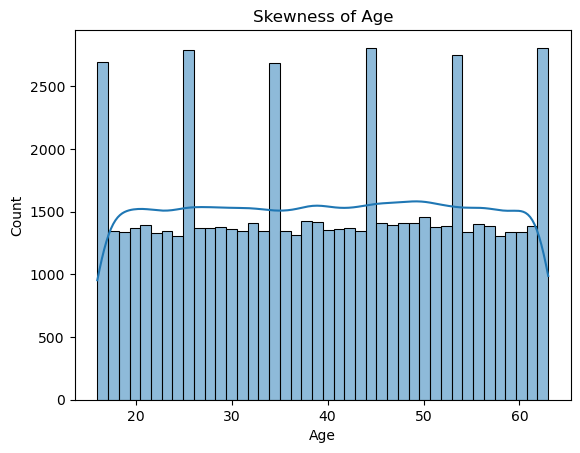

In [193]:
sns.histplot(df['Age'], kde=True)
plt.title('Skewness of Age')

In [194]:
#Imputing missing values in the age column with mean
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [195]:
#Sorting dataframe from based on ascending order of the Purchase Date
df.sort_values(by='Purchase_DATE', ascending=True)

,Customer_id,Age,Gender,Revenue_Total,N_Purchases,Purchase_DATE,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher
57917,562225,40,0,39.0,3,2021-01-01,7.020,3,299,1,0,0
37580,541888,29,0,16.4,2,2021-01-01,7.380,0,158,0,1,0
33366,537674,49,1,34.4,6,2021-01-01,28.552,1,133,1,1,1
62969,567277,33,1,33.1,5,2021-01-01,5.627,1,735,3,0,0
325,504633,49,1,35.6,6,2021-01-01,27.056,3,863,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
60999,565307,48,1,4.3,5,2022-01-01,2.365,2,759,1,0,1
33981,538289,56,1,27.1,6,2022-01-01,0.813,0,319,0,0,0
37628,541936,24,1,18.2,4,2022-01-01,9.828,2,199,0,0,0
55635,559943,63,1,57.7,4,2022-01-01,40.967,2,322,0,0,1


In [196]:
#Finding customers who's been innactive since
condition = (df['Purchase_DATE'] <= '2021-06-30')
# Apply the condition to filter the DataFrame
filtered_date = df[df['Purchase_DATE'] <= '2021-06-30']
filtered_date.shape

(32435, 12)

In [197]:
# Convert 'Purchase_DATE' to datetime format and extract useful features
df['Purchase_Month'] = df['Purchase_DATE'].dt.month
df['Purchase_Day'] = df['Purchase_DATE'].dt.day

In [198]:
#Create the Average_Purchase_Value feature
df['Average_PurchaseValue'] = df['Revenue_Total'] / df['N_Purchases']

In [199]:
'''# Define age bins and labels
bins = [0, 25, 55, float('inf')]
labels = ['Young Adults', 'Adults', 'Seniors']

# Create the Age_Group column with the new labels
df['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels)
df.head()'''

"# Define age bins and labels\nbins = [0, 25, 55, float('inf')]\nlabels = ['Young Adults', 'Adults', 'Seniors']\n\n# Create the Age_Group column with the new labels\ndf['Age_Group'] = pd.cut(df['Age'], bins=bins, labels=labels)\ndf.head()"

In [200]:
df.head()

,Customer_id,Age,Gender,Revenue_Total,N_Purchases,Purchase_DATE,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher,Purchase_Month,Purchase_Day,Average_PurchaseValue
0,504308,53,0,45.3,2,2021-06-22,24.915,1,885,0,0,0,6,22,22.650000
1,504309,18,1,36.2,3,2021-12-10,2.896,2,656,0,0,1,12,10,12.066667
2,504310,52,1,10.6,1,2021-03-14,10.600,0,761,0,1,0,3,14,10.600000
3,504311,29,0,54.1,5,2021-10-25,43.280,1,906,0,1,0,10,25,10.820000
4,504312,21,1,56.9,1,2021-09-14,56.900,1,605,0,1,0,9,14,56.900000


In [201]:
# Aggregate data based on the 'Gender' column
browserbased_sales = df.groupby('Browser').agg({
    'Revenue_Total': 'mean',
    'N_Purchases': 'sum',
    'Time_Spent': 'mean'
}).reset_index().rename(columns={
    'Revenue_Total': 'Average_Revenue',
    'N_Purchases': 'Total_Purchases',
    'Time_Spent': 'Average_Time_Spent'
})
browserbased_sales

,Browser,Average_Revenue,Total_Purchases,Average_Time_Spent
0,0,27.813685,167532,598.151488
1,1,27.557495,52456,601.029159
2,2,27.332899,13550,600.182114
3,3,27.768688,29151,599.022475


In [202]:
#  Get summary statistics for the voucher subscribed group (where voucher =1)
summary_v_susbscribed = (df.groupby('Voucher').get_group(1)).describe()
summary_v_susbscribed


,Customer_id,Age,Gender,Revenue_Total,N_Purchases,Purchase_DATE,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher,Purchase_Month,Purchase_Day,Average_PurchaseValue
count,16466.000000,16466.000000,16466.000000,16466.000000,16466.000000,16466,16466.000000,16466.000000,16466.000000,16466.000000,16466.000000,16466.0,16466.000000,16466.000000,16466.000000
mean,537235.899915,39.561885,0.672598,27.734781,3.976922,2021-07-04 12:21:30.805295616,15.958135,1.295700,599.640593,0.629357,0.153650,1.0,6.573485,15.746022,10.340928
min,504309.000000,16.000000,0.000000,0.500000,1.000000,2021-01-01 00:00:00,0.014000,0.000000,120.000000,0.000000,0.000000,1.0,1.000000,1.000000,0.071429
25%,520962.250000,28.000000,0.000000,15.300000,2.000000,2021-04-05 00:00:00,4.760000,0.000000,358.000000,0.000000,0.000000,1.0,4.000000,8.000000,3.871429
50%,537160.500000,40.000000,1.000000,30.200000,4.000000,2021-07-06 00:00:00,12.530500,1.000000,596.000000,0.000000,0.000000,1.0,7.000000,16.000000,6.960000
75%,553717.500000,51.000000,1.000000,37.600000,6.000000,2021-10-03 00:00:00,24.800000,2.000000,842.000000,1.000000,0.000000,1.0,10.000000,23.000000,12.566667
max,570097.000000,63.000000,1.000000,59.900000,7.000000,2022-01-01 00:00:00,59.900000,3.000000,1080.000000,3.000000,1.000000,1.0,12.000000,31.000000,59.900000
std,18967.079403,13.824960,0.469280,14.962292,2.006325,NaN,13.271337,1.078831,278.207851,0.998297,0.360624,0.0,3.440842,8.811064,10.393271


In [203]:
#  Get summary statistics for the voucher subscribed group (where voucher =1)
summary_v_notsusbscribed = (df.groupby('Voucher').get_group(0)).describe()
summary_v_notsusbscribed

,Customer_id,Age,Gender,Revenue_Total,N_Purchases,Purchase_DATE,Purchase_VALUE,Pay_Method,Time_Spent,Browser,Newsletter,Voucher,Purchase_Month,Purchase_Day,Average_PurchaseValue
count,49330.000000,49330.00000,49330.00000,49330.000000,49330.000000,49330,49330.000000,49330.000000,49330.000000,49330.000000,49330.000000,49330.0,49330.000000,49330.000000,49330.000000
mean,537195.352727,39.60298,0.67093,27.732319,3.997669,2021-07-02 16:24:02.043381248,15.972225,1.312974,598.686945,0.631462,0.150152,0.0,6.517373,15.699655,10.266174
min,504308.000000,16.00000,0.00000,0.500000,1.000000,2021-01-01 00:00:00,0.005000,0.000000,120.000000,0.000000,0.000000,0.0,1.000000,1.000000,0.071429
25%,520694.250000,28.00000,0.00000,15.300000,2.000000,2021-04-02 00:00:00,4.845000,0.000000,358.000000,0.000000,0.000000,0.0,4.000000,8.000000,3.883333
50%,537223.500000,40.00000,1.00000,30.100000,4.000000,2021-07-03 00:00:00,12.675000,1.000000,599.000000,0.000000,0.000000,0.0,7.000000,16.000000,6.869048
75%,553635.750000,52.00000,1.00000,37.600000,6.000000,2021-10-03 00:00:00,24.737250,2.000000,840.000000,1.000000,0.000000,0.0,10.000000,23.000000,12.325000
max,570103.000000,63.00000,1.00000,59.900000,7.000000,2022-01-01 00:00:00,59.900000,3.000000,1080.000000,3.000000,1.000000,0.0,12.000000,31.000000,59.900000
std,19002.910012,13.82576,0.46988,14.935209,2.003710,NaN,13.215365,1.082977,277.711025,0.995784,0.357224,0.0,3.465563,8.807369,10.422668


In [204]:
df.to_csv('powerbi.csv', index=False)

In [205]:
# Drop the unwanted columns
df = df.drop(columns=['Purchase_DATE','Customer_id'])


In [206]:
# One-hot encode 'Payment_Method' and 'Browser' columns
df_encoded = pd.get_dummies(df, columns=['Pay_Method', 'Browser'])
df_encoded.head()

,Age,Gender,Revenue_Total,N_Purchases,Purchase_VALUE,Time_Spent,Newsletter,Voucher,Purchase_Month,Purchase_Day,Average_PurchaseValue,Pay_Method_0,Pay_Method_1,Pay_Method_2,Pay_Method_3,Browser_0,Browser_1,Browser_2,Browser_3
0,53,0,45.3,2,24.915,885,0,0,6,22,22.650000,False,True,False,False,True,False,False,False
1,18,1,36.2,3,2.896,656,0,1,12,10,12.066667,False,False,True,False,True,False,False,False
2,52,1,10.6,1,10.600,761,1,0,3,14,10.600000,True,False,False,False,True,False,False,False
3,29,0,54.1,5,43.280,906,1,0,10,25,10.820000,False,True,False,False,True,False,False,False
4,21,1,56.9,1,56.900,605,1,0,9,14,56.900000,False,True,False,False,True,False,False,False


In [207]:
correlation_matrix = df_encoded.corr()
correlation_matrix

,Age,Gender,Revenue_Total,N_Purchases,Purchase_VALUE,Time_Spent,Newsletter,Voucher,Purchase_Month,Purchase_Day,Average_PurchaseValue,Pay_Method_0,Pay_Method_1,Pay_Method_2,Pay_Method_3,Browser_0,Browser_1,Browser_2,Browser_3
Age,1.000000,0.001892,0.000091,-0.005580,0.006416,-0.001506,0.003068,-0.001288,-0.002580,0.002786,0.008046,-0.000930,-0.001691,0.004828,-0.002062,-0.007451,0.004296,0.003853,0.003234
Gender,0.001892,1.000000,-0.001006,0.001474,-0.002496,0.001595,-0.001282,0.001538,-0.003654,0.000541,0.001108,0.002142,0.003402,0.002278,-0.008886,0.000362,-0.002603,-0.003393,0.005172
Revenue_Total,0.000091,-0.001006,1.000000,0.005794,0.649235,-0.003520,0.003578,0.000071,-0.004199,0.006385,0.528085,-0.003755,-0.003494,0.004939,0.003208,0.007198,-0.005864,-0.006227,0.000839
N_Purchases,-0.005580,0.001474,0.005794,1.000000,-0.219670,0.001604,-0.001593,-0.004484,0.001690,0.002689,-0.638502,-0.004805,0.000192,0.003334,0.001810,-0.007193,0.000281,0.002316,0.009061
Purchase_VALUE,0.006416,-0.002496,0.649235,-0.219670,1.000000,-0.003069,0.001272,-0.000461,0.000351,0.002326,0.664488,-0.002288,0.002956,-0.000126,-0.000676,0.002906,-0.003946,-0.003326,0.002934
Time_Spent,-0.001506,0.001595,-0.003520,0.001604,-0.003069,1.000000,0.003764,0.001487,0.006141,-0.009024,-0.002179,-0.001751,-0.005369,0.004341,0.003716,-0.003711,0.003781,0.001052,0.000122
Newsletter,0.003068,-0.001282,0.003578,-0.001593,0.001272,0.003764,1.000000,0.004231,0.002973,-0.001840,0.003773,-0.001202,-0.000129,-0.002107,0.003780,-0.000409,-0.003265,-0.000388,0.005082
Voucher,-0.001288,0.001538,0.000071,-0.004484,-0.000461,0.001487,0.004231,1.000000,0.007026,0.002280,0.003109,0.005051,0.000260,0.000887,-0.007103,0.003517,-0.005718,0.001889,0.000577
Purchase_Month,-0.002580,-0.003654,-0.004199,0.001690,0.000351,0.006141,0.002973,0.007026,1.000000,0.015715,-0.001595,0.003546,0.000617,-0.005596,0.001100,-0.000639,-0.000177,-0.003576,0.003735
Purchase_Day,0.002786,0.000541,0.006385,0.002689,0.002326,-0.009024,-0.001840,0.002280,0.015715,1.000000,0.005449,-0.001016,0.003391,-0.002322,-0.000331,0.000342,0.003547,0.002088,-0.006540


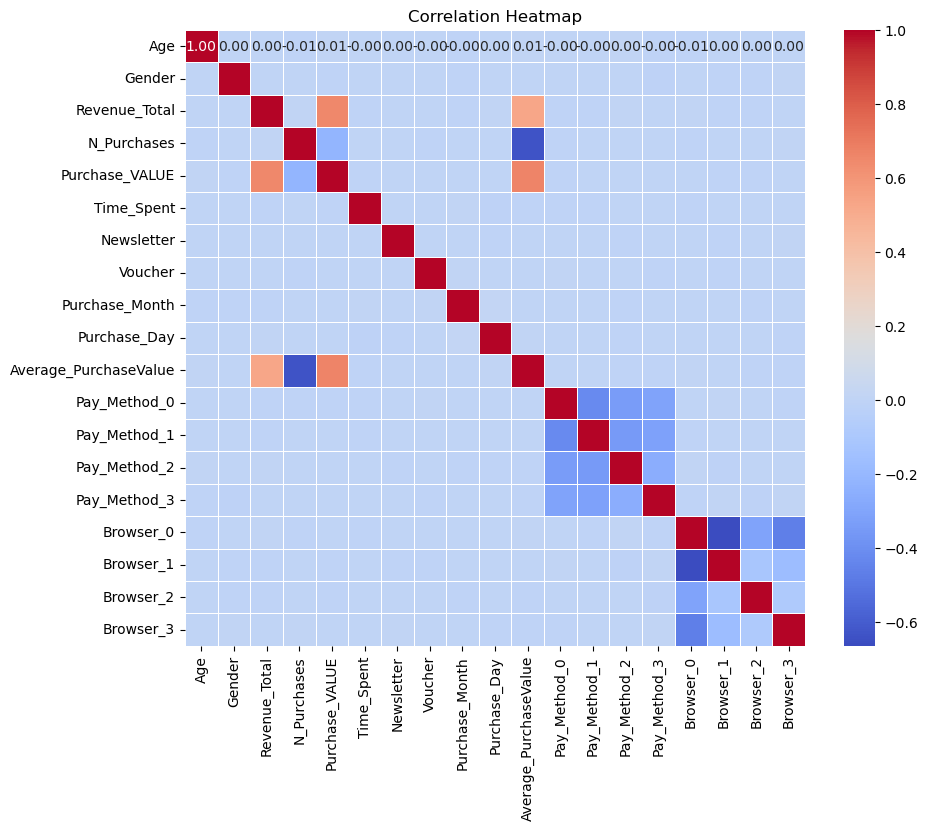

In [208]:
import seaborn as sns
import matplotlib.pyplot as plt
# Generate the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [209]:
df_encoded.to_csv('cleaned.csv', index=False)

In [210]:
from scipy import stats
from scipy.stats import ttest_ind

In [211]:
# Hypotheses:There is no significant difference in average purchase value between voucher subscribers and non subscribers
#null hypothesis: There is no significant difference in average purchase value between voucher subscribers and non subscribers
# Alternative Hypothesis: There is a significant difference in the average purchase value between voucher subscribers and non subscribers.

subscribers = df[df['Voucher'] == 1]['Average_PurchaseValue']
non_subscribers = df[df['Voucher'] == 0]['Average_PurchaseValue']

# Perform the two-sample t-test
t_stat, p_value = ttest_ind(subscribers, non_subscribers) #, equal_var=False)  

# Output the results
print(f"T-test for Purchase_VALUE: t-statistic = {t_stat:.3f}, p-value = {p_value:.3f}")

# Interpretation based on the p-value
alpha = 0.05  # Significance level

if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in the average purchase value between voucher subscribers and non subscribers.")
else:
    print("Fail to reject the null hypothesis . There is no significant difference in average purchase value between voucher subscribers and non subscribers.")

T-test for Purchase_VALUE: t-statistic = 0.797, p-value = 0.425
Fail to reject the null hypothesis . There is no significant difference in average purchase value between voucher subscribers and non subscribers.


In [212]:
#Chi sqare for age group and voucher subscription
# age group bins
df['Age_Group'] = pd.cut(df['Age'], bins=[0, 25, 55, 100], labels=['Young_Adult', 'Mid_aged', 'Senior'])

#Hypothesis : There is no significant association between age group and voucher subscription
#Alternative hypothesis : There is a significant association between age group and voucher subscription
# contingency table
contingency_table = pd.crosstab(df['Age_Group'], df['Voucher'])

# performing Chi-Square Test of Independence
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

#results
print("Chi-Square Statistic:", chi2_stat)
print("P-value:", p_value)
print("Degrees of Freedom:", dof)



alpha = 0.05  # significance level

if p_value < alpha:
    print("Reject the null hypothesis: There is a significant association between age group and voucher usage.")
else:
    print("Fail to reject the null hypothesis: There is no significant association between age group and voucher usage.")

Chi-Square Statistic: 0.9891792577334544
P-value: 0.6098211089346004
Degrees of Freedom: 2
Fail to reject the null hypothesis: There is no significant association between age group and voucher usage.


In [213]:
#Null hypothesis : There is a significant difference in the mean age between customers who used vouchers and those who did not.
#Alternative hypothesis :There is no significant difference in the mean age between customers who used vouchers and those who did not.
# Separate the data into two groups based on Voucher usage
subscribers = df[df['Voucher'] == 1]['Purchase_VALUE']
non_subscriber= df[df['Voucher'] == 0]['Purchase_VALUE']

# Perform the T-test
t_stat, p_value = stats.ttest_ind(subscribers, non_subscriber)

# Output the results
print("T-statistic:", t_stat)
print("P-value:", p_value)


alpha = 0.05  # Common significance level

if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in the mean age between customers who used vouchers and those who did not.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the mean age between customers who used vouchers and those who did not.")

T-statistic: -0.11833564523075452
P-value: 0.9058020762479224
Fail to reject the null hypothesis: There is no significant difference in the mean age between customers who used vouchers and those who did not.


In [78]:
# Filter the data for customers who used the voucher
subscribers = df[df['Voucher'] == 1]['Age']

# Shapiro-Wilk test
shapiro_stat, p_value = stats.shapiro(subscribers)

# results
print("Shapiro-Wilk Statistic:", shapiro_stat)
print("P-value:", p_value)

# Interpretation
alpha = 0.05  #  significance level

if p_value < alpha:
    print("Reject the null hypothesis: Age distribution among customers who subscribed the voucher is not normally distributed.")
else:
    print("Fail to reject the null hypothesis: The age distribution among customers who subscribed vouchers is normally distributed.")

Shapiro-Wilk Statistic: 0.9550184863022012
P-value: 1.1148730850621585e-56
Reject the null hypothesis: The age distribution among customers who used vouchers is not normally distributed.


/tmp/ipykernel_1268/3996351224.py:5: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 16466.
  shapiro_stat, p_value = stats.shapiro(voucher_used)


In [80]:
#voucher usage and news letter subscription
# Create a contingency table
contingency_table = pd.crosstab(df['Newsletter'], df['Voucher'])

# Perform Chi-Square Test of Independence
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Output the results
print("Chi-Square Statistic:", chi2_stat)
print("P-value:", p_value)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:\n", expected)

# Interpretation
alpha = 0.05  # Common significance level

if p_value < alpha:
    print("Reject the null hypothesis: There is a significant association between voucher usage and newsletter subscription.")
else:
    print("Fail to reject the null hypothesis: There is no significant association between voucher usage and newsletter subscription.")

Chi-Square Statistic: 1.1509360424697617
P-value: 0.2833532888715159
Degrees of Freedom: 1
Expected Frequencies Table:
 [[41879.81746611 13979.18253389]
 [ 7450.18253389  2486.81746611]]
Fail to reject the null hypothesis: There is no significant association between voucher usage and newsletter subscription.
